# **Import Dependencies¶**


In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import os
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# **Define Data Path¶**


In [52]:
data_path = '/Users/akhilmohan/Downloads/archive/'

In [53]:
classes = os.listdir(data_path)

# **Visualize the classes**

In [54]:
def plot_class(path):
    plt.figure(figsize=(12,12))
    title = path.split('/')[-1]
    for i in range(1,5):
        plt.subplot(1,4,i)
        plt.tight_layout()
        rand_img = plt.imread(path +'/'+ random.choice(sorted(os.listdir(path))))
        plt.imshow(rand_img)
        plt.title(title, fontsize=15, color='blue')
        plt.xticks([])
        plt.yticks([])

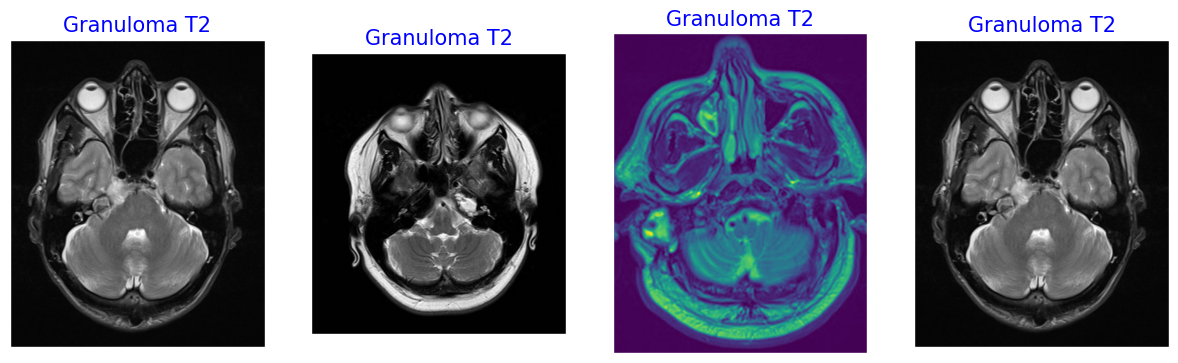

In [55]:
plot_class(data_path+classes[0])

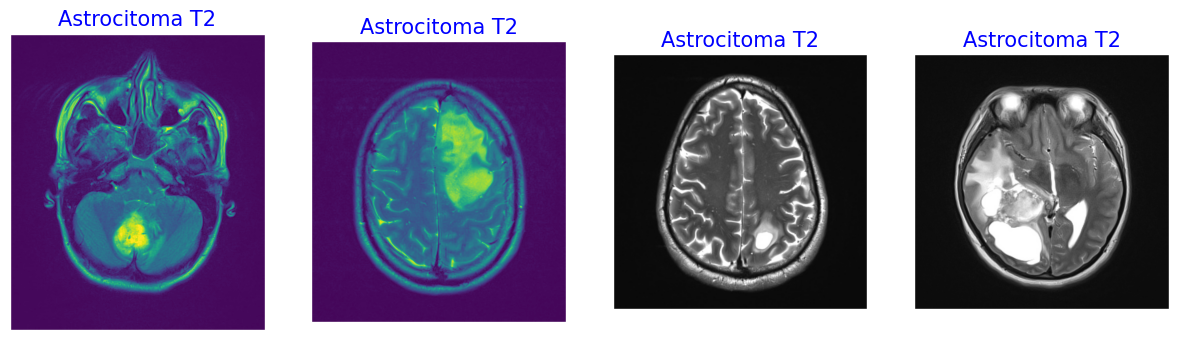

In [56]:
plot_class(data_path+classes[1])

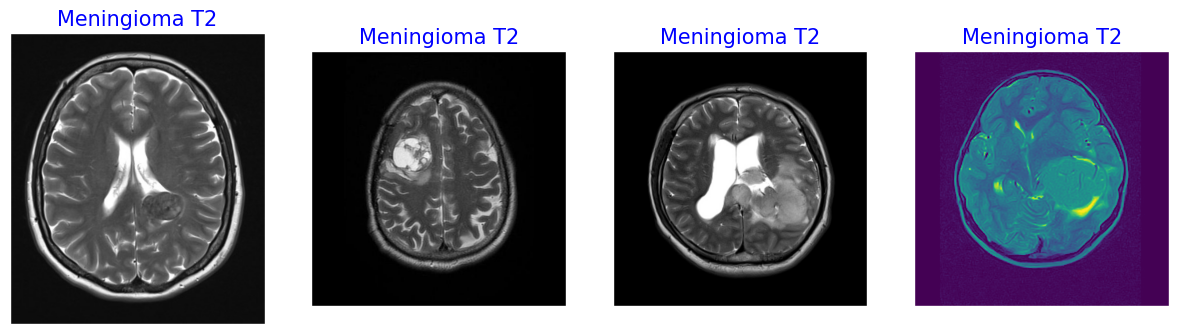

In [57]:
plot_class(data_path+classes[2])

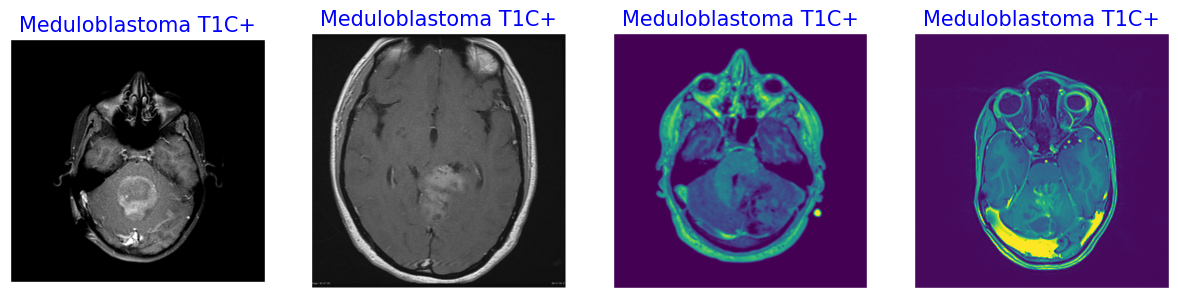

In [58]:
plot_class(data_path+classes[3])

**We see here some images with grayscale and others with rgb**

# **EDA**

In [61]:
def main(train_data_path):
    
    """
    return training and testing dataframes including 2 columns image path and its label
    
    Args:
      train_data_path (string): string includes your train data path
      test_data_path (string): string includes your test data path
      note: data_path argument must contains your classes dirs
      
    Returns:
      train_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the training images and the label of each image
      test_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the testing images and the label of each image

    """
    
    for dirs in [train_data_path]:

        filepaths = []
        labels = []
        classes_list = sorted(os.listdir(dirs))

        filepaths,labels = get_fileList(classes_list, dirs, filepaths, labels)
        
        train_df = obtain_train_df(filepaths, labels)
        
            
    return train_df


def get_fileList(classes_list, dirs, filepaths, labels):
    
    """
    return file paths list including all full image paths and label for each one
    
    Args:
      classes_list (list): list includes name of classes dirs
      dirs (string): the data path
      filepaths (list): empty list to fill with images paths later
      labels (list): empty list to fill with each image label later
      
    Returns:
      count (scalar):  number of images in your dataset
    """
    
    for s_class in classes_list:
        
        label = s_class
        classpath = os.path.join(dirs, s_class)
        if os.path.isdir(classpath):
            flist = sorted(os.listdir(classpath))
            store_image_names_and_its_labels(flist, classpath, filepaths, labels, label)
        
    return filepaths, labels



def store_image_names_and_its_labels(flist, classpath, filepaths, labels, label):
    
    """
    return nothing, it fills the filepaths list with all the images paths and its labels
    
    Args:
      flist (list) : contains all the image names in certain class
      classes_list (list): list includes name of classes dirs
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      label (string): label for a specific image
      
    Returns:
      nothing
    """
    
    
    for file in flist:
        file_path = os.path.join(classpath, file)
        filepaths.append(file_path)
        labels.append(label)



def obtain_train_df(filepaths, labels):
    
    """
    Return Dataframe with 2 columns contains each image path with its label
    
    Args:
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      
    Returns:
      train_df (DataFrame):  Dataframe with 2 columns contains each image path with its label
    """
    
    train_df =pd.DataFrame({
        'image_path' : filepaths,
        'label' : labels
    })
    return train_df

In [62]:
data_df = main(data_path)

In [63]:
data_df.head()

,image_path,label
0,/Users/akhilmohan/Downloads/archive/Astrocitom...,Astrocitoma T1
1,/Users/akhilmohan/Downloads/archive/Astrocitom...,Astrocitoma T1
2,/Users/akhilmohan/Downloads/archive/Astrocitom...,Astrocitoma T1
3,/Users/akhilmohan/Downloads/archive/Astrocitom...,Astrocitoma T1
4,/Users/akhilmohan/Downloads/archive/Astrocitom...,Astrocitoma T1


In [64]:
num_classes = len(data_df['label'].unique())
print(f"We have {num_classes} classes")
print(f"We have {data_df.shape[0]} images")

We have 44 classes
We have 4479 images


In [65]:
data_df['label'].value_counts()

Meningioma T1C+           369
Meningioma T1             272
_NORMAL T2                271
_NORMAL T1                251
Astrocitoma T1C+          233
Meningioma T2             233
Neurocitoma T1C+          223
Schwannoma T1C+           194
Astrocitoma T1            176
Astrocitoma T2            171
Schwannoma T1             148
Neurocitoma T1            130
Schwannoma T2             123
Carcinoma T1C+            112
Papiloma T1C+             108
Neurocitoma T2            104
Glioblastoma T1C+          94
Oligodendroglioma T1       86
Tuberculoma T1C+           84
Carcinoma T2               73
Oligodendroglioma T1C+     72
Meduloblastoma T1C+        67
Papiloma T1                66
Oligodendroglioma T2       66
Carcinoma T1               66
Papiloma T2                63
Ependimoma T2              57
Glioblastoma T2            55
Glioblastoma T1            55
Ependimoma T1C+            48
Ependimoma T1              45
Meduloblastoma T2          41
Germinoma T1C+             40
Tuberculom

In [66]:
def count_plot(x, title, xlabel, ylabel, width, length, order = None, rotation=False, palette='winter'):
    plt.figure(figsize=(width,length))
    sns.countplot(x = x, palette=palette, order = order)
    plt.title(title, fontsize=25)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.show()

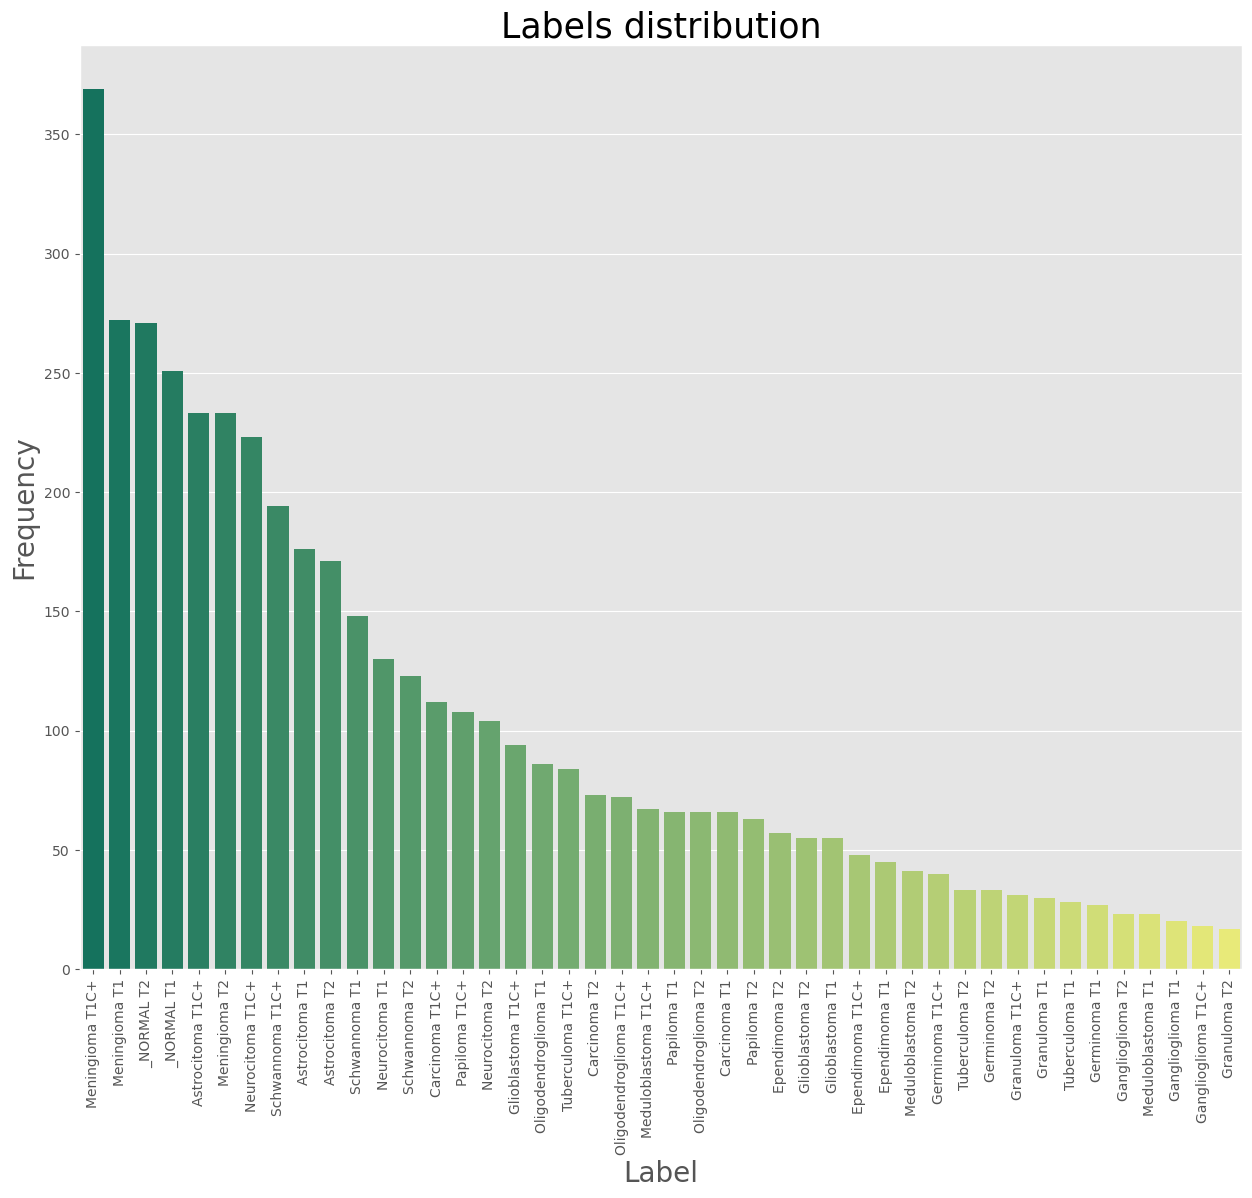

In [67]:
x = data_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution", "Label", 'Frequency', 15,12, rotation = True, order=order, palette='summer')

**Data is imbalanced**

# **Split the data into train, test and val dataframes**

In [115]:
test_split_size = 0.3
train_df, test_df = train_test_split(data_df, test_size=test_split_size, shuffle=True, random_state=123, stratify=data_df['label'])
test_df, valid_df = train_test_split(test_df, test_size=0.5, shuffle=True, random_state=123, stratify=test_df['label'])

In [116]:
train_df.head()

,image_path,label
2175,/Users/akhilmohan/Downloads/archive/Meningioma...,Meningioma T1C+
1735,/Users/akhilmohan/Downloads/archive/Meningioma...,Meningioma T1
1191,/Users/akhilmohan/Downloads/archive/Glioblasto...,Glioblastoma T1
129,/Users/akhilmohan/Downloads/archive/Astrocitom...,Astrocitoma T1
1645,/Users/akhilmohan/Downloads/archive/Meningioma...,Meningioma T1


In [117]:
test_df.head()

,image_path,label
3506,/Users/akhilmohan/Downloads/archive/Schwannoma...,Schwannoma T1C+
1822,/Users/akhilmohan/Downloads/archive/Meningioma...,Meningioma T1
3265,/Users/akhilmohan/Downloads/archive/Papiloma T...,Papiloma T1C+
4371,/Users/akhilmohan/Downloads/archive/_NORMAL T2...,_NORMAL T2
244,/Users/akhilmohan/Downloads/archive/Astrocitom...,Astrocitoma T1C+


In [118]:
valid_df.head()

,image_path,label
3652,/Users/akhilmohan/Downloads/archive/Schwannoma...,Schwannoma T1C+
300,/Users/akhilmohan/Downloads/archive/Astrocitom...,Astrocitoma T1C+
481,/Users/akhilmohan/Downloads/archive/Astrocitom...,Astrocitoma T2
4051,/Users/akhilmohan/Downloads/archive/_NORMAL T1...,_NORMAL T1
892,/Users/akhilmohan/Downloads/archive/Ependimoma...,Ependimoma T1C+


In [119]:
print(f"We have {len(train_df)} images in the training dataset\nWe have {len(valid_df)} images in the validating dataset\nWe have {len(test_df)} images in the testing dataset")

We have 3135 images in the training dataset
We have 672 images in the validating dataset
We have 672 images in the testing dataset


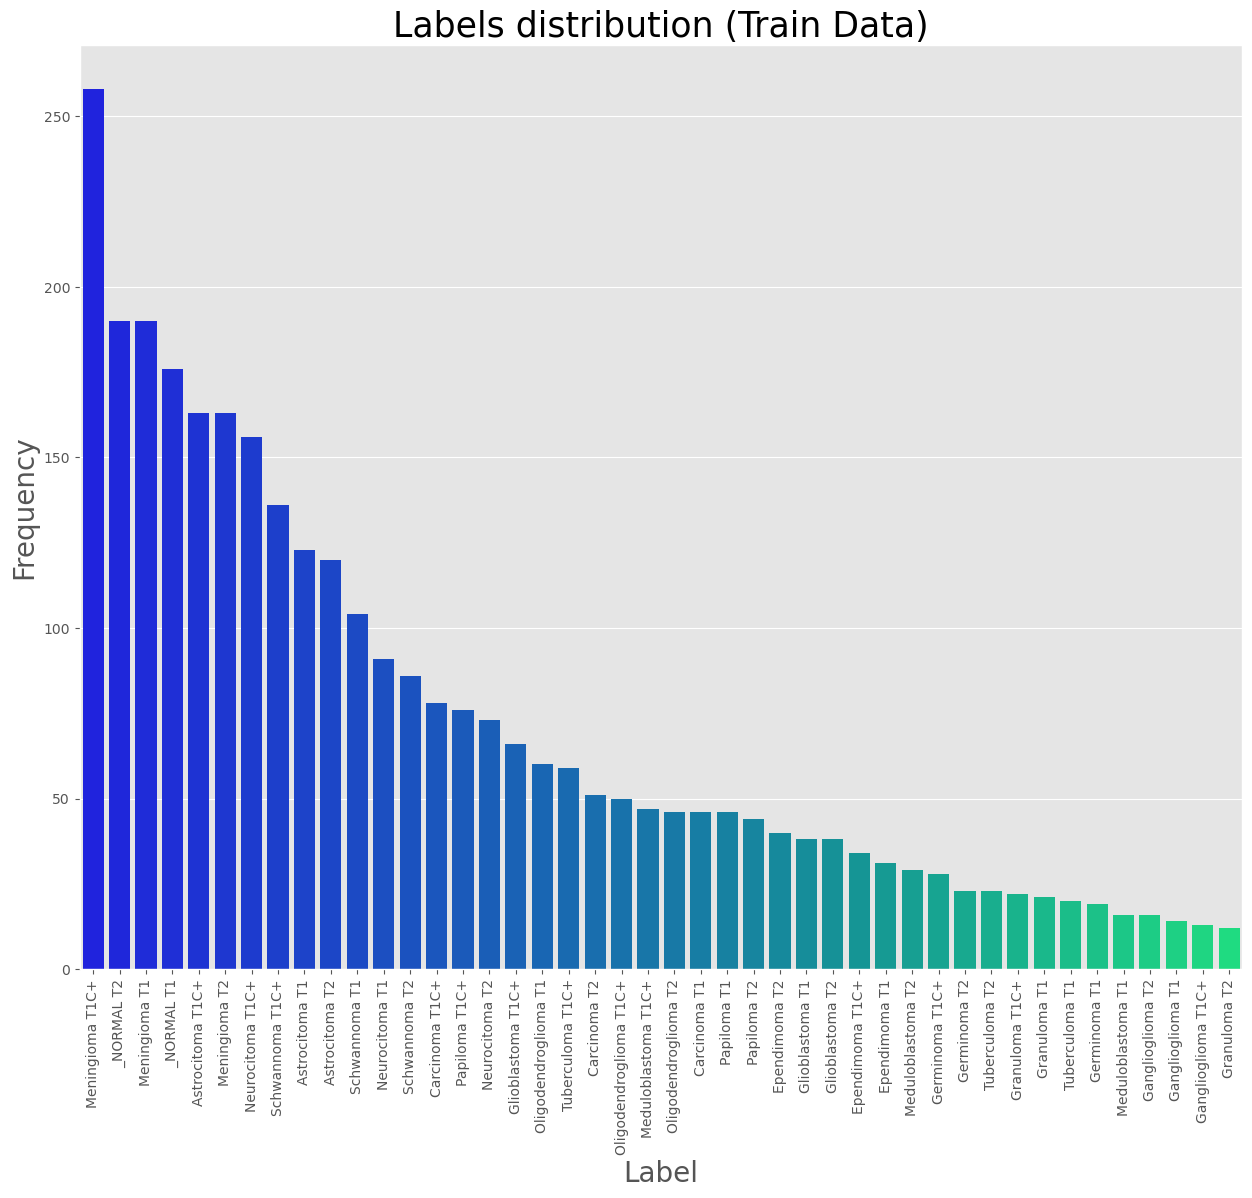

In [120]:
x = train_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Train Data)", "Label", 'Frequency', 15,12, rotation = True, order=order)

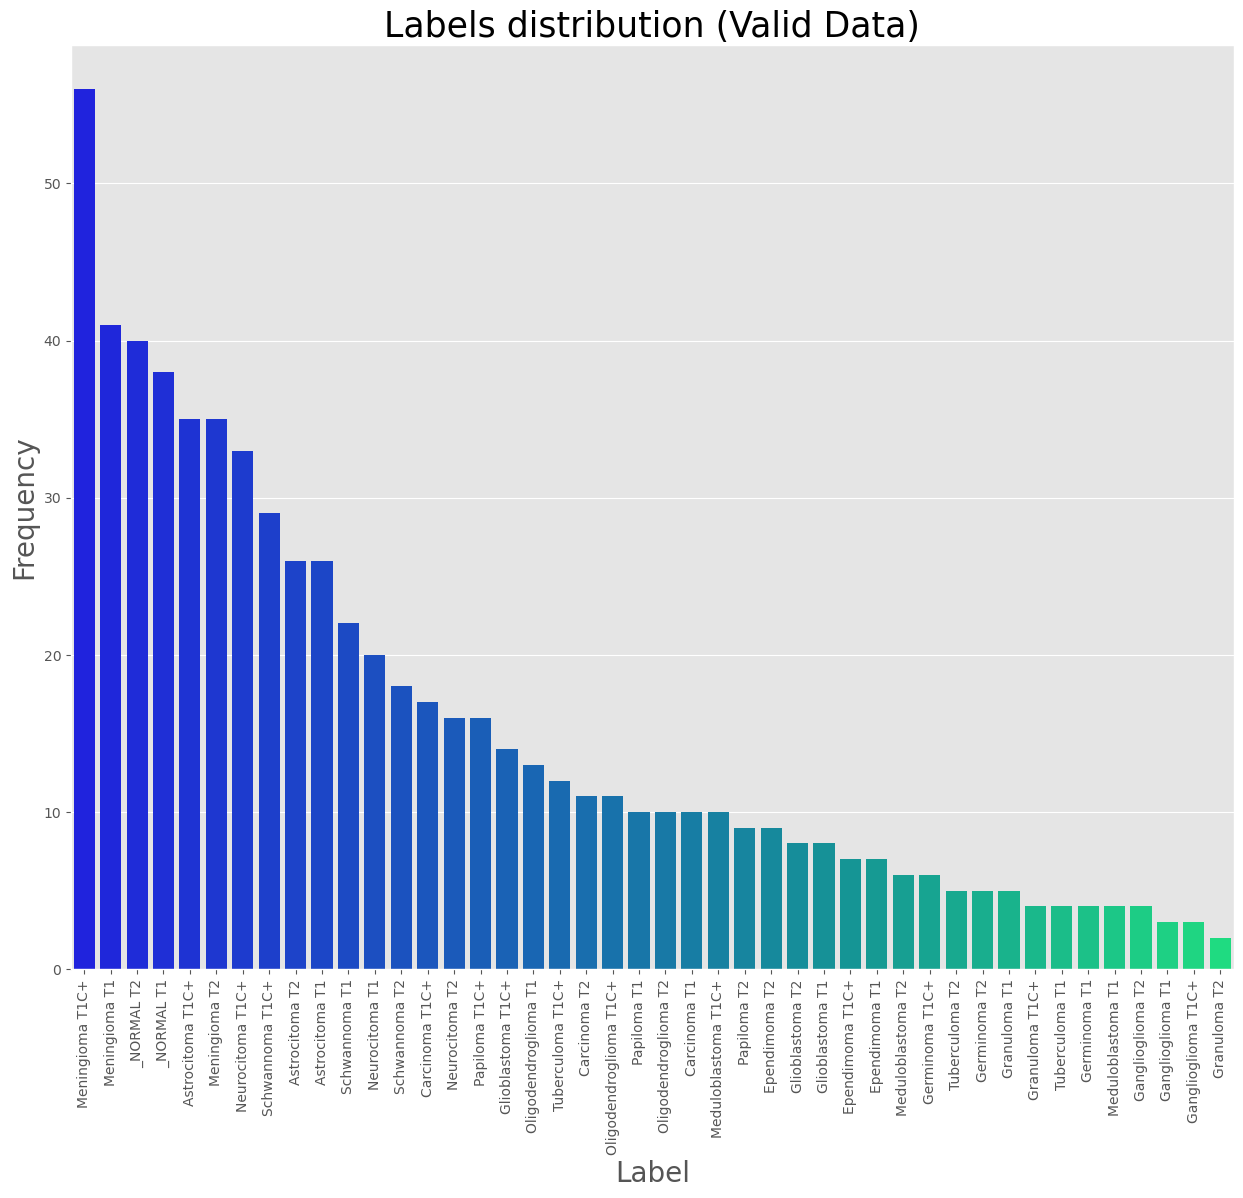

In [121]:
x = valid_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Valid Data)", "Label", 'Frequency', 15,12, rotation = True, order=order)

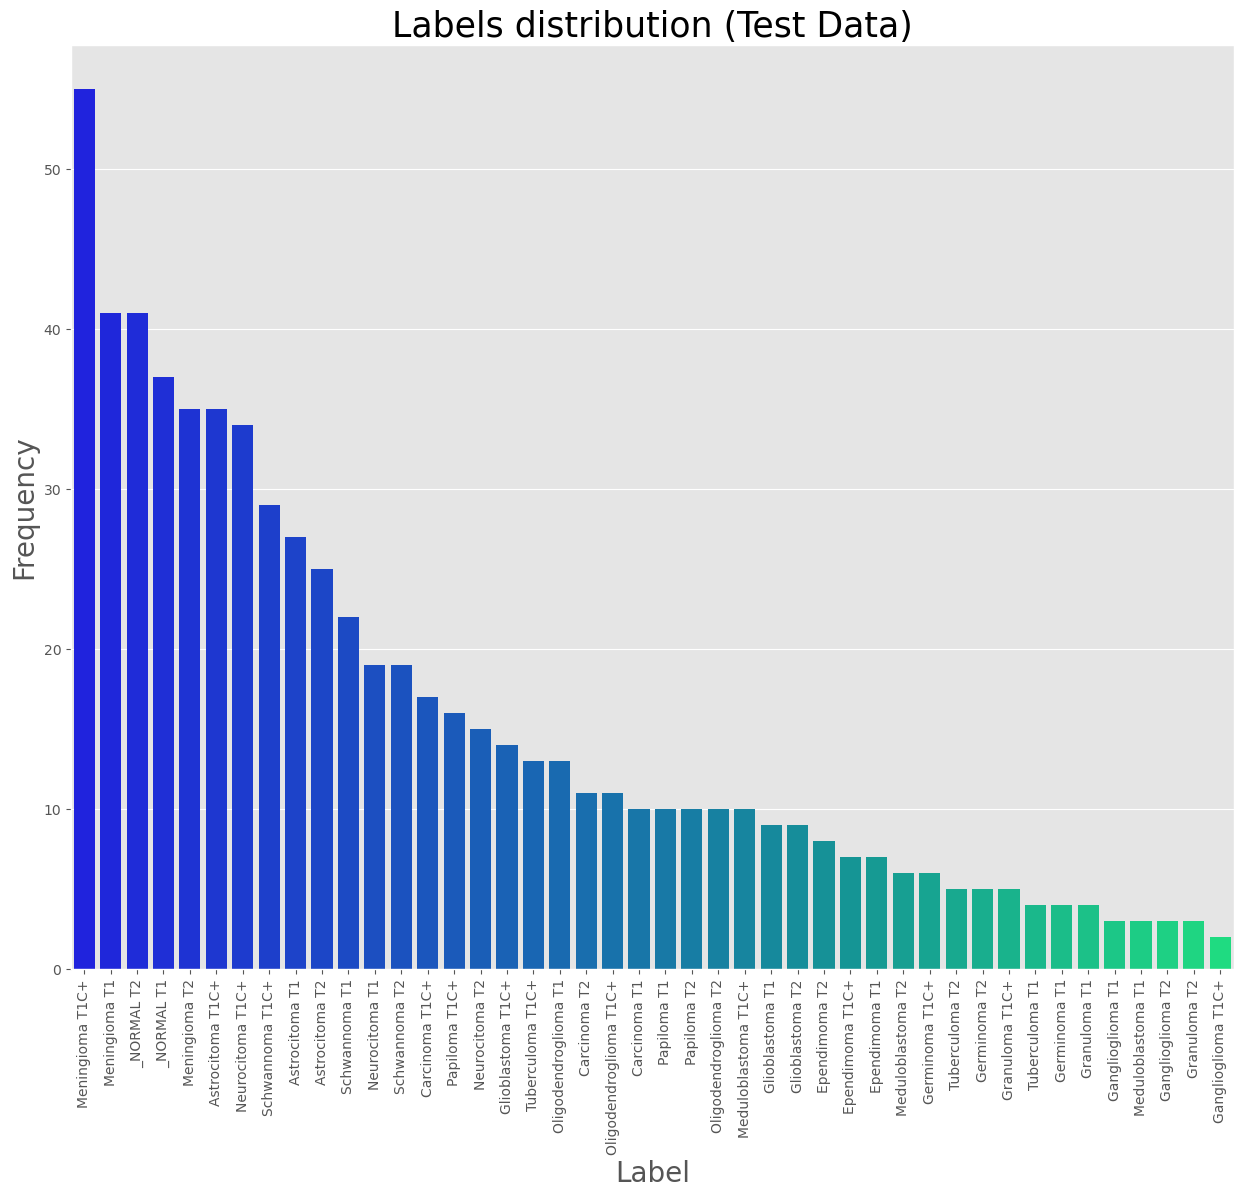

In [122]:
x = test_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Test Data)", "Label", 'Frequency', 15,12, rotation = True, order=order)

In [123]:
img_size = (64,64)
channels = 3
color = 'rgb'
img_shape = (img_size[0], img_size[1], channels)
batch_size = 32
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size
def scalar(img):
    return img

In [124]:
tr_gen = ImageDataGenerator(preprocessing_function= scalar, 
                            horizontal_flip= True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, 
                                      x_col= 'image_path', 
                                      y_col= 'label', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= color, 
                                      shuffle= False, 
                                      batch_size= test_batch_size)

Found 3134 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.


/Users/akhilmohan/Documents/anaconda3/envs/tf-2/lib/python3.10/site-packages/keras/preprocessing/image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [125]:
class_count = len(list(train_gen.class_indices.keys())) 

In [128]:
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top= False, 
                                                               weights= "imagenet", 
                                                               input_shape= img_shape,
                                                               pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, 
          kernel_regularizer= regularizers.l2(l= 0.016), 
          activity_regularizer= regularizers.l1(0.006),
          bias_regularizer= regularizers.l1(0.006), 
          activation= 'relu'),
    
    Dropout(rate= 0.45, 
            seed= 123),
    
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional)  (None, 2048)             28513527  
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 44)                11308     
                                                                 
Total params: 29,057,571
Trainable params: 28,880,732
Non-trainable params: 176,839
____________________________________

In [129]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)


history = model.fit(x= train_gen, 
                    epochs= 200, 
                    callbacks=[early_stop, checkpoint],
                    validation_data= valid_gen)

Epoch 1/200
98/98 [==============================] - ETA: 0s - loss: 10.9423 - accuracy: 0.1911
Epoch 1: val_loss improved from inf to 9.69083, saving model to model_weights.h5
98/98 [==============================] - 112s 1s/step - loss: 10.9423 - accuracy: 0.1911 - val_loss: 9.6908 - val_accuracy: 0.1771
Epoch 2/200
98/98 [==============================] - ETA: 0s - loss: 8.5940 - accuracy: 0.4193
Epoch 2: val_loss improved from 9.69083 to 8.20936, saving model to model_weights.h5
98/98 [==============================] - 105s 1s/step - loss: 8.5940 - accuracy: 0.4193 - val_loss: 8.2094 - val_accuracy: 0.3869
Epoch 3/200
98/98 [==============================] - ETA: 0s - loss: 7.1227 - accuracy: 0.5479
Epoch 3: val_loss improved from 8.20936 to 6.82272, saving model to model_weights.h5
98/98 [==============================] - 95s 970ms/step - loss: 7.1227 - accuracy: 0.5479 - val_loss: 6.8227 - val_accuracy: 0.5238
Epoch 4/200
98/98 [==============================] - ETA: 0s - loss: 5

Epoch 28/200
98/98 [==============================] - ETA: 0s - loss: 0.5091 - accuracy: 0.9825
Epoch 28: val_loss did not improve from 0.73399
98/98 [==============================] - 88s 899ms/step - loss: 0.5091 - accuracy: 0.9825 - val_loss: 0.7478 - val_accuracy: 0.9152
Epoch 29/200
98/98 [==============================] - ETA: 0s - loss: 0.4986 - accuracy: 0.9834
Epoch 29: val_loss improved from 0.73399 to 0.66607, saving model to model_weights.h5
98/98 [==============================] - 89s 906ms/step - loss: 0.4986 - accuracy: 0.9834 - val_loss: 0.6661 - val_accuracy: 0.9375
Epoch 30/200
98/98 [==============================] - ETA: 0s - loss: 0.4975 - accuracy: 0.9805
Epoch 30: val_loss did not improve from 0.66607
98/98 [==============================] - 89s 901ms/step - loss: 0.4975 - accuracy: 0.9805 - val_loss: 0.7523 - val_accuracy: 0.9092
Epoch 31/200
98/98 [==============================] - ETA: 0s - loss: 0.4934 - accuracy: 0.9844
Epoch 31: val_loss did not improve fro

In [130]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

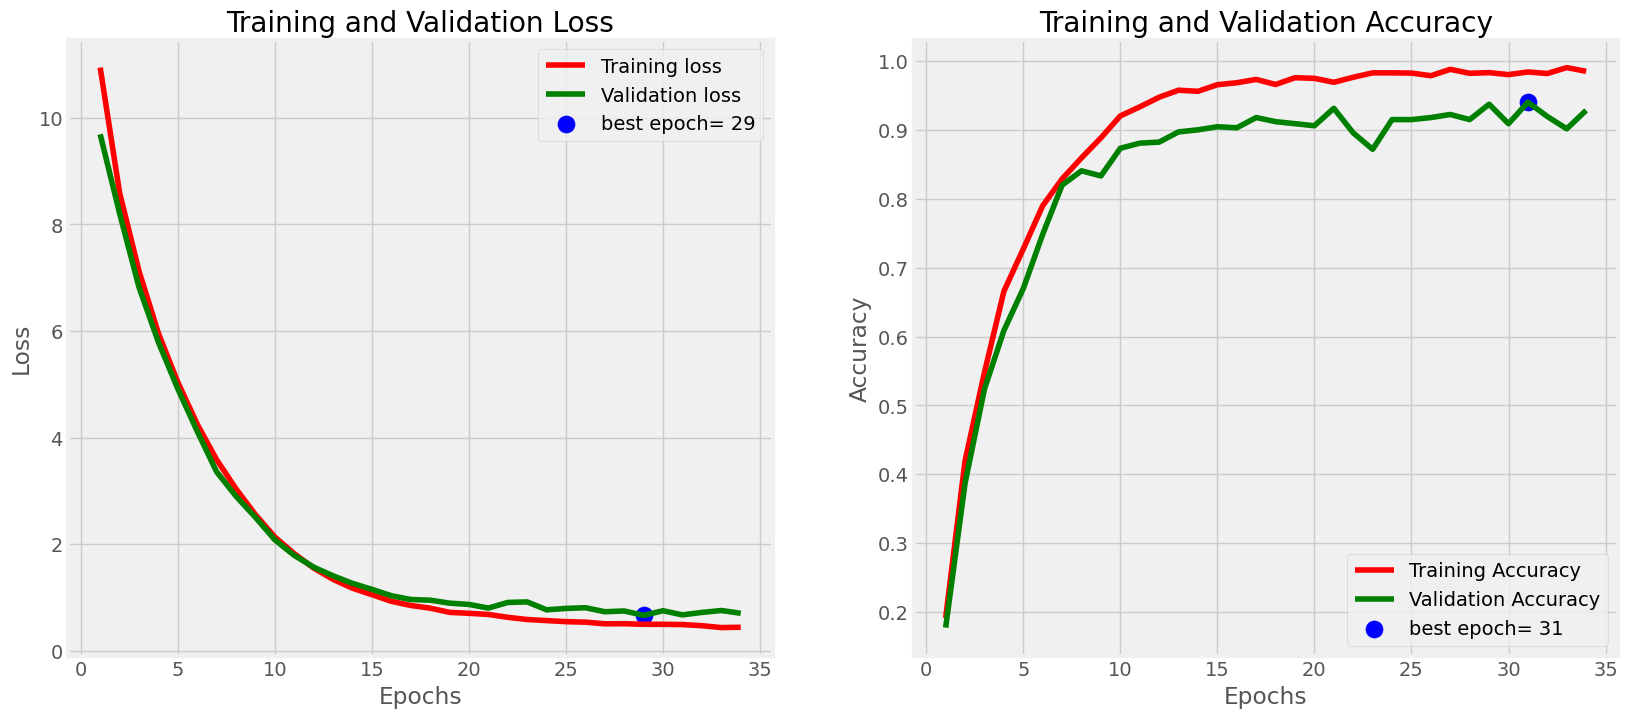

In [131]:
plot_training(history)

In [132]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

12/12 [==============================] - 4s 303ms/step - loss: 0.7695 - accuracy: 0.9062
Train Loss:  0.36204779148101807
Train Accuracy:  0.9973958134651184
--------------------
Validation Loss:  0.7036590576171875
Validation Accuracy:  0.9244791865348816
--------------------
Test Loss:  0.7694754004478455
Test Accuracy:  0.90625


# **Plot Confussion Matrix**

In [133]:
y_pred = model.predict(test_gen)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = test_gen.classes

12/12 [==============================] - 6s 301ms/step


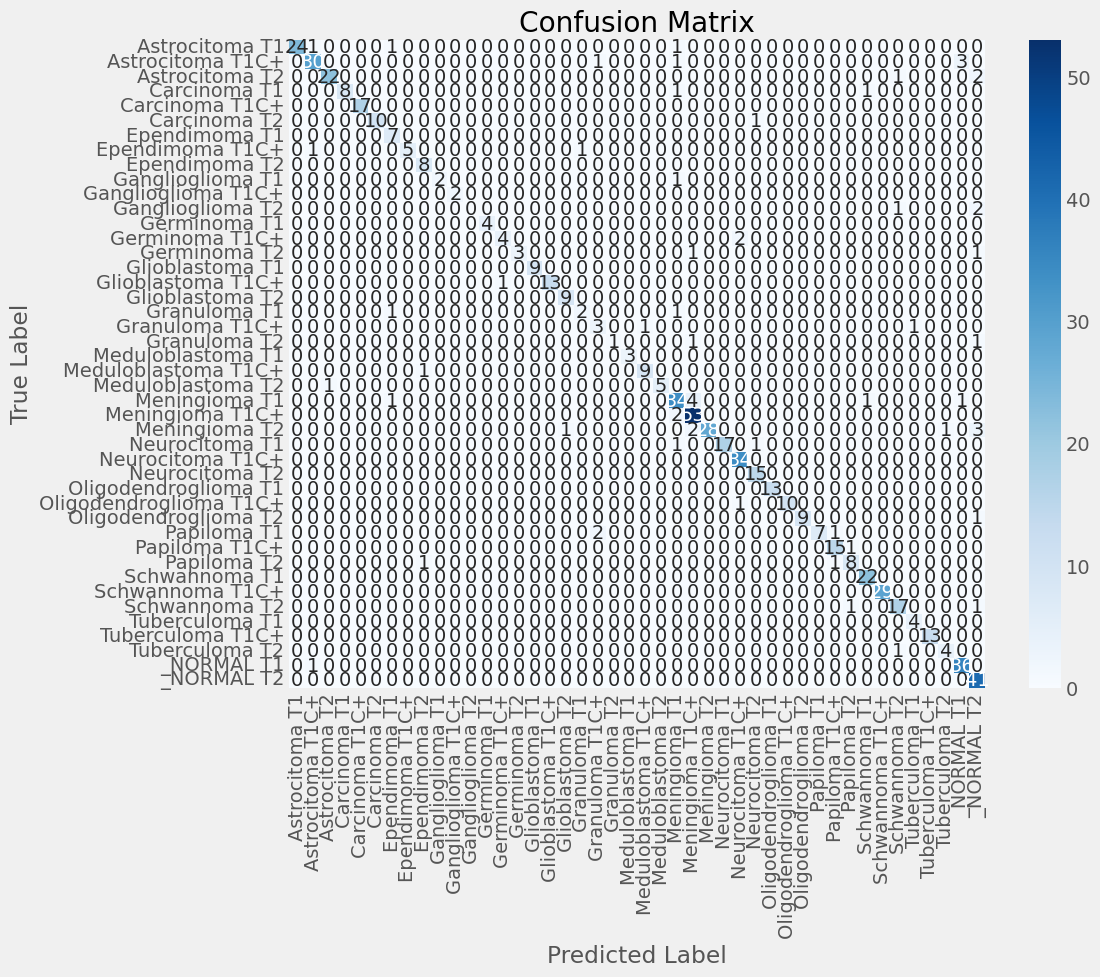

In [134]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Generate Classification Report**

In [135]:
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)

print("Classification Report: ")
print(report)

Classification Report: 
                        precision    recall  f1-score   support

        Astrocitoma T1       1.00      0.89      0.94        27
      Astrocitoma T1C+       0.91      0.86      0.88        35
        Astrocitoma T2       0.96      0.88      0.92        25
          Carcinoma T1       1.00      0.80      0.89        10
        Carcinoma T1C+       1.00      1.00      1.00        17
          Carcinoma T2       1.00      0.91      0.95        11
         Ependimoma T1       0.70      1.00      0.82         7
       Ependimoma T1C+       1.00      0.71      0.83         7
         Ependimoma T2       0.80      1.00      0.89         8
      Ganglioglioma T1       1.00      0.67      0.80         3
    Ganglioglioma T1C+       1.00      1.00      1.00         2
      Ganglioglioma T2       0.00      0.00      0.00         3
          Germinoma T1       1.00      1.00      1.00         4
        Germinoma T1C+       0.80      0.67      0.73         6
          Germi

/Users/akhilmohan/Documents/anaconda3/envs/tf-2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akhilmohan/Documents/anaconda3/envs/tf-2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akhilmohan/Documents/anaconda3/envs/tf-2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_